# init var

## 合體

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import os
import pandas as pd

In [2]:
# def search_file()

def get_data_mini(setting, step, moving_step=5):
    temp = list()
    seeds = [222, 223, 224, 225]
    for seed in seeds:
        if "zero" in setting:
            for initvar in [0,1]:
                try: 
                    foldername = "./results/miniimagenet/FOMAML_SOMAML/{}_initvar{}.0_seed{}/test_E11S2300.csv".format(setting, initvar, seed)
                    data = pd.read_csv(foldername).values[:,step]
                    if not (len(data) == 155):
                        continue
                    temp.append(data)
                    continue
                except: 
                    pass
                try: 
                    foldername = "./results/miniimagenet/FOMAML_SOMAML/{}_seed{}/test_E6S1000.csv".format(setting, seed)
                    data = pd.read_csv(foldername).values[:,step]
                    if not (len(data) == 156):
                        continue
                    temp.append(data[:155])
                except: 
                    continue                    
        else:
            try: 
                foldername = "./results/miniimagenet/FOMAML_SOMAML/{}_seed{}/test_E11S2300.csv".format(setting, seed)
                data = pd.read_csv(foldername).values[:,step]
                if not (len(data) == 155):
                    continue
                temp.append(data)
                continue
                break
            except: 
                pass
            try: 
                foldername = "./results/miniimagenet/FOMAML_SOMAML/{}_seed{}/test_E6S1000.csv".format(setting, seed)
                data = pd.read_csv(foldername).values[:,step]
                if (len(data) == 156):
                    continue
                temp.append(data[:155])
            except: 
                continue
                    
    return moving_average(np.mean(temp, axis=0), moving_step),  moving_average(np.std(temp, axis=0), moving_step)

def moving_average(x, w):
    return np.concatenate((x[:5],np.convolve(x[5:], np.ones(w), 'valid') / w))

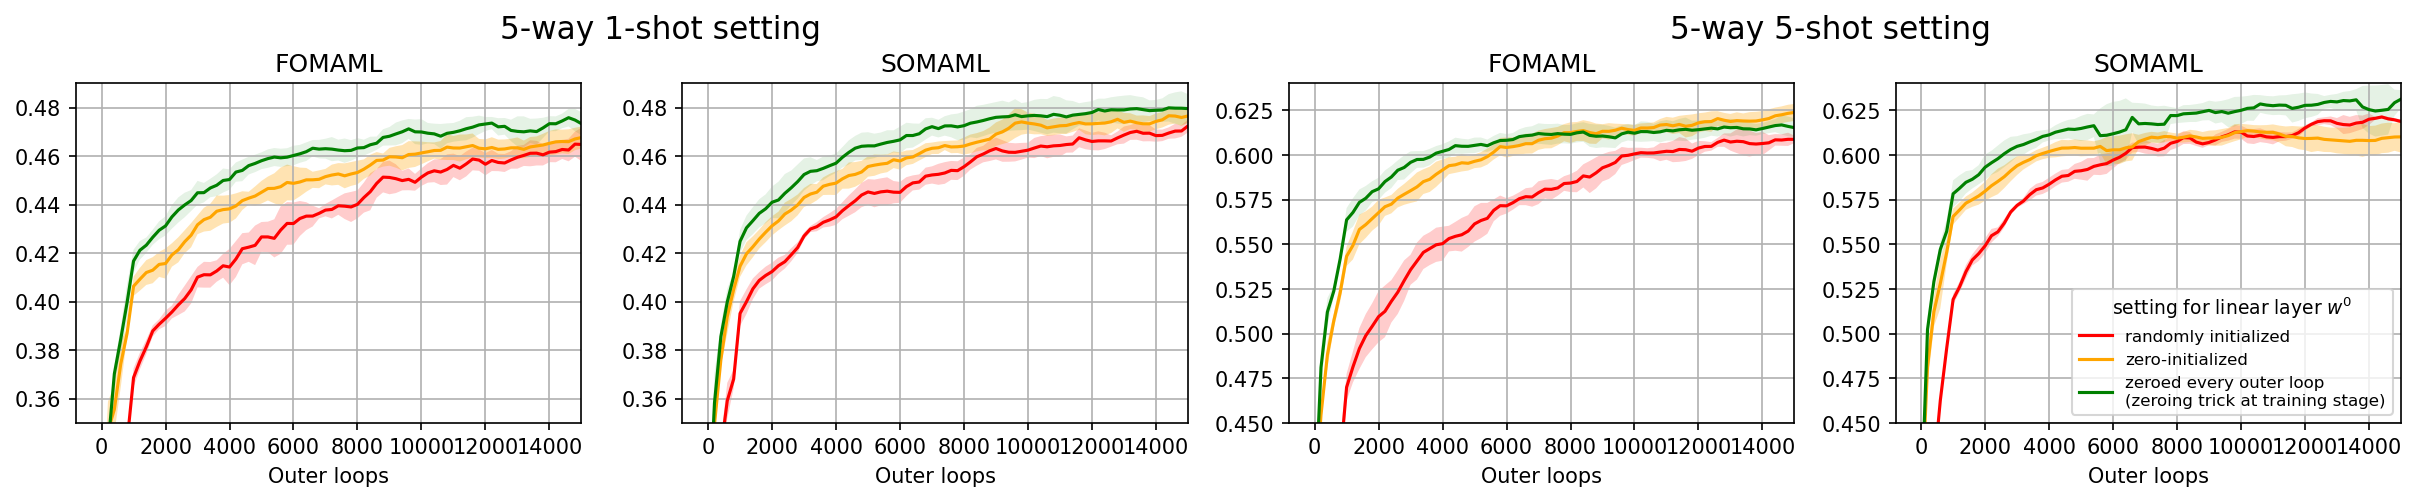

In [5]:
fig, axes = plt.subplots(1,4,figsize=(20,3), sharex=True, dpi=150)

fill_color = True

labels = [
    "randomly initialized", 
    "zero-initialized", 
    "zeroed every outer loop \n(zeroing trick at training stage)",
    "randomly initialized", 
    "zero-initialized", 
    "zeroed every outer loop \n(zeroing trick at training stage)",
]

step = 3

ax = axes[0]
mean, std = get_data_mini("mini_5w1s15q_FO_initvar1.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[0], c="red")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="red", alpha=0.2)
mean, std = get_data_mini("mini_5w1s15q_FO_initvar0.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[1], c="orange")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="orange", alpha=0.3)
mean, std = get_data_mini("mini_5w1s15q_FO_zero1", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[2], c="green")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="green", alpha=0.1)

ax = axes[1]
mean, std = get_data_mini("mini_5w1s15q_SO_initvar1.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[3], c="red")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="red", alpha=0.2)
mean, std = get_data_mini("mini_5w1s15q_SO_initvar0.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[4], c="orange")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="orange", alpha=0.3)
mean, std = get_data_mini("mini_5w1s15q_SO_zero1", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[5], c="green")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="green", alpha=0.1)

ax = axes[2] 
mean, std = get_data_mini("mini_5w5s15q_FO_initvar1.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[0], c="red")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="red", alpha=0.2)
mean, std = get_data_mini("mini_5w5s15q_FO_initvar0.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[1], c="orange")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="orange", alpha=0.3)
mean, std = get_data_mini("mini_5w5s15q_FO_zero1", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[2], c="green")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="green", alpha=0.1)

ax = axes[3]
mean, std = get_data_mini("mini_5w5s15q_SO_initvar1.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[3], c="red")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="red", alpha=0.2)
mean, std = get_data_mini("mini_5w5s15q_SO_initvar0.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[4], c="orange")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="orange", alpha=0.3)
mean, std = get_data_mini("mini_5w5s15q_SO_zero1", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[5], c="green")
if fill_color: ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="green", alpha=0.1)

plt.text(0.32, 0.98, '5-way 1-shot setting', transform=fig.transFigure, horizontalalignment='center', fontsize=15)
axes[0].set_title("FOMAML")
axes[1].set_title("SOMAML")
plt.text(0.71, 0.98, '5-way 5-shot setting', transform=fig.transFigure, horizontalalignment='center', fontsize=15)
axes[2].set_title("FOMAML")
axes[3].set_title("SOMAML")

axes[0].set_ylim([0.35, 0.49])
axes[1].set_ylim([0.35, 0.49])
axes[2].set_ylim([0.45, 0.65])
axes[3].set_ylim([0.45, 0.65])

for i, ax in enumerate(axes.flatten()):
    
    ax.tick_params(axis='both', which='major')
    ax.set_xlabel("Outer loops")
    ax.set_xlim([-800,15000]) 
    ax.grid() 

axes[0].set_ylim([0.35, 0.49])
axes[1].set_ylim([0.35, 0.49])
axes[2].set_ylim([0.45, 0.64])
axes[3].set_ylim([0.45, 0.64])

axes[3].legend(loc=4, title=r"setting for linear layer $w^0$", title_fontsize=9, fontsize=8)

plt.savefig("./images/mini_fomaml_somaml_20220301.pdf", bbox_inches='tight')